# This notebook implements linear regression for a machine learning exercise.

In [103]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Warm-Up Exercise
# A simple function to return a 5x5 identity matrix.

In [104]:
def warmUpExercise():
    return np.eye(5)

# Test warmUpExercise
print("Running warmUpExercise...")
print("5x5 Identity Matrix:")
print(warmUpExercise())

Running warmUpExercise...
5x5 Identity Matrix:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Loading and plotting data
# Load and visualize data from ex1data1.txt

In [105]:
# Load data
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
X = data[:, 0]  # Population size in 10,000s
y = data[:, 1]  # Profit in $10,000s
m = len(y)  # Number of training examples

# Plotting data
# Function to plot the data points.

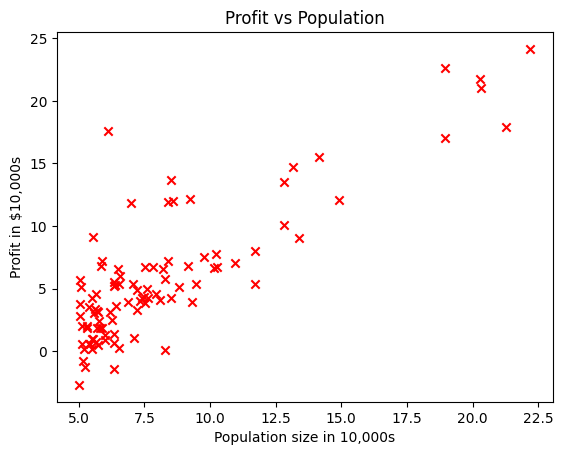

In [106]:
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r')
    plt.xlabel('Population size in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profit vs Population')
    plt.show()

# Plot data
plotData(X, y)

# Cost function and gradient descent
# Implementing cost function and gradient descent for muli variable problem.

In [107]:
# Compute cost
def computeCostMulti(X, Y, theta):
    """
    Calcula a funcao custo para um problema de regressão linear multivariável.

    Parâmetros:
      X      : Matriz de entrada com dimensão (m, n). Certifique-se de que, se desejar
               o intercepto, X possua uma coluna de 1's.
      Y      : Vetor de saída (target) com dimensão (m,).
      theta  : Vetor dos parâmetros com dimensão (n,).
      N      : Número de iterações para o gradiente descendente.

    Retorna:
      theta_atualizado : Vetor de parâmetros ajustado após N iterações.
      custos           : Histórico do valor da função de custo em cada iteração.
    """
    m = len(Y)  # número de exemplos
    # Cálculo da hipótese. Para cada exemplo: h_theta = X * theta.
    h = X.dot(theta)
    # Erro = diferença entre a hipótese e o valor real
    erro = h - Y
    # Cálculo do custo (função de custo do Mínimos Quadrados)
    custos = (1 / (2 * m)) * np.sum(erro ** 2)
    
    return custos


def gradientDescentMulti(X, Y, theta, alfa, N):
    """
    Executa o método do gradiente descendente para ajustar os parâmetros de 
    uma regressão linear multivariável.

    Parâmetros:
      X      : Matriz de entrada com dimensão (m, n). Certifique-se de que, se desejar
               o intercepto, X possua uma coluna de 1's.
      Y      : Vetor de saída (target) com dimensão (m,).
      theta  : Vetor inicial dos parâmetros com dimensão (n,).
      alfa   : Taxa de aprendizado.
      N      : Número de iterações para o gradiente descendente.

    Retorna:
      theta_atualizado : Vetor de parâmetros ajustado após N iterações.
      custos           : Histórico do valor da função de custo em cada iteração.
    """
    m = len(Y)  # número de exemplos
    custos = np.zeros(N)  # para armazenar o custo em cada iteração
    #J_history = []

    for i in range(N):
        # Cálculo da hipótese. Para cada exemplo: h_theta = X * theta.
        h = X.dot(theta)
        # Erro = diferença entre a hipótese e o valor real
        erro = h - Y
        # Gradiente da função de custo. Fórmula derivada: (1/m) * (X^T * erro)
        gradiente = (1 / m) * X.T.dot(erro)
        # Atualização dos parâmetros
        theta = theta - alfa * gradiente
        # Cálculo do custo (função de custo do Mínimos Quadrados)
        custos[i] = (1 / (2 * m)) * np.sum(erro ** 2)
    
    return theta, custos

# Prepare data for linear regression

In [108]:
X_with_intercept = np.column_stack((np.ones(m), X))
theta = np.zeros(2)  # Initialize fitting parameters
iterations = 1500
alpha = 0.01

In [109]:
# Test cost function
print("\nTesting the cost function...")
J = computeCostMulti(X_with_intercept, y, theta)
print(f"With theta = [0 ; 0]\nCost computed = {J}")
print("Expected cost value (approx) 32.07")


Testing the cost function...
With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [110]:
J = computeCostMulti(X_with_intercept, y, np.array([-1, 2]))
print(f"With theta = [-1 ; 2]\nCost computed = {J}")
print("Expected cost value (approx) 54.24")

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [111]:
# Run gradient descent
theta,custos = gradientDescentMulti(X_with_intercept, y, theta, alpha, iterations)
print("Theta found by gradient descent:")
print(theta)
print("Expected theta values (approx): [-3.6303, 1.1664]")

Theta found by gradient descent:
[-3.63029144  1.16636235]
Expected theta values (approx): [-3.6303, 1.1664]


# Plot linear fit

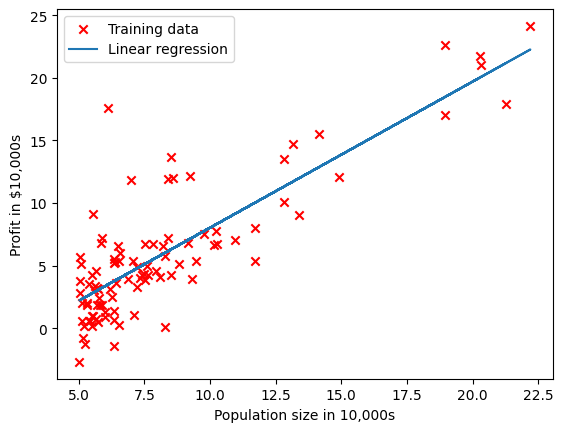

In [112]:
plt.scatter(X, y, marker='x', c='r', label='Training data')
plt.plot(X, X_with_intercept @ theta, '-', label='Linear regression')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

# Predict values

In [113]:
predict1 = np.array([1, 3.5]) @ theta
predict2 = np.array([1, 7]) @ theta
print(f"For population = 35,000, we predict a profit of {predict1 * 10000}")
print(f"For population = 70,000, we predict a profit of {predict2 * 10000}")

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944712


# Visualizing $J(\theta_0, \theta_1)$
# Visualize the cost function to see how it changes with different values of theta.

In [114]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [115]:
# Compute cost for each combination of theta0 and theta1
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[i, j] = computeCost(X_with_intercept, y, t)

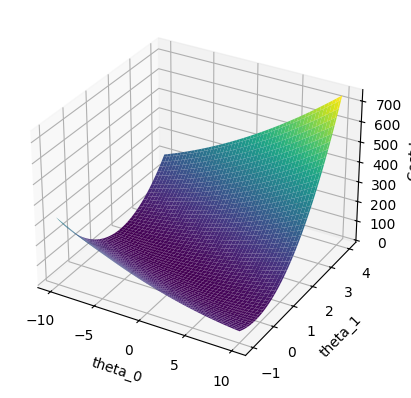

In [116]:
# Surface plot
J_vals = J_vals.T  # Transpose for correct orientation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost J')
plt.show()

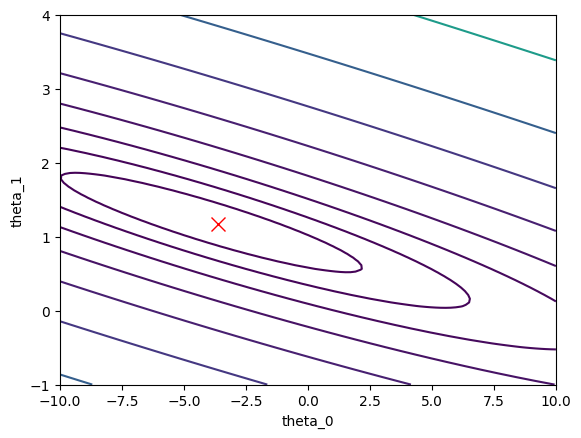

In [117]:
# Contour plot
plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)
plt.show()


# Initialization
# Linear regression with multiple variables for predicting house prices.

In [118]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
# Load data from ex1data2.txt

In [119]:
# Load data
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :2]  # Features: size and number of bedrooms
y = data[:, 2]   # Target: price
m = len(y)       # Number of training examples

# Display first 10 examples of the dataset
print("First 10 examples from the dataset:")
for i in range(10):
    print(f"x = [{X[i, 0]:.0f}, {X[i, 1]:.0f}], y = {y[i]:.0f}")

First 10 examples from the dataset:
x = [2104, 3], y = 399900
x = [1600, 3], y = 329900
x = [2400, 3], y = 369000
x = [1416, 2], y = 232000
x = [3000, 4], y = 539900
x = [1985, 4], y = 299900
x = [1534, 3], y = 314900
x = [1427, 3], y = 198999
x = [1380, 3], y = 212000
x = [1494, 3], y = 242500


In [120]:
# Normalize features
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

print("Normalizing Features...")
X, mu, sigma = featureNormalize(X)

print("Normalizing Features...")
X, mu, sigma = featureNormalize(X)

Normalizing Features...
Normalizing Features...


In [121]:
# Add intercept term to X
X = np.column_stack((np.ones(m), X))

# Gradient Descent
# Implementing gradient descent for multiple variables.

In [122]:
# Compute cost
#def computeCostMulti(X, y, theta):
#    #TODO: implement this part of code
#   return 

In [123]:
# Gradient descent
#def gradientDescentMulti(X, y, theta, alpha, num_iters):
#    #TODO: implement this part of code
#    return


In [124]:
# Running gradient descent
alpha = 0.01
num_iters = 800

theta = np.zeros(X.shape[1])  # Initialize fitting parameters
print("Running gradient descent...")

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)


Running gradient descent...


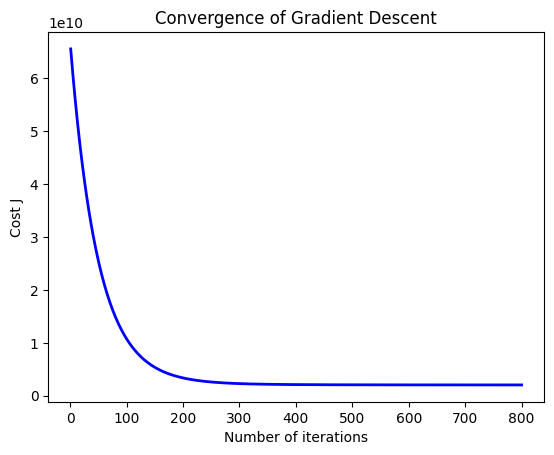

Theta computed from gradient descent:
[340302.97100295 107744.19899198  -4875.11193358]


In [125]:
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

In [126]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms
normalized_features = (np.array([1650, 3]) - mu) / sigma
normalized_features = np.insert(normalized_features, 0, 1)  # Add intercept term
price = normalized_features @ theta

print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")
print(f'Expected price (approx): 289314.62')


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 178103605.97
Expected price (approx): 289314.62


## Optional: Selecting learning rates

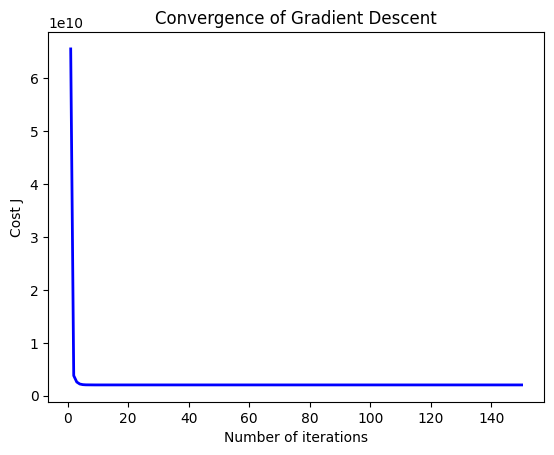

Theta computed from gradient descent:
[340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ 178103605.97


In [127]:
# Running gradient descent
alpha = 1.
num_iters = 150

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)
print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $ {price:.2f}")

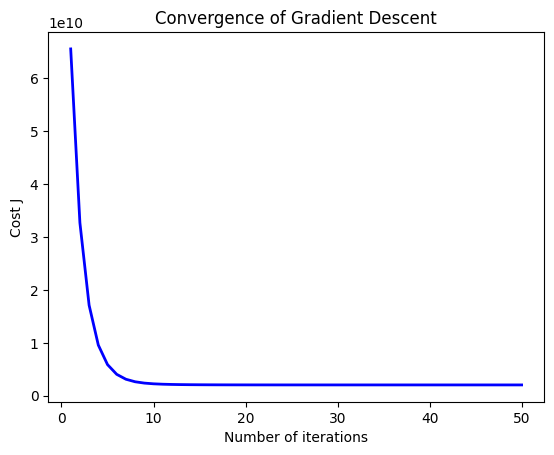

Theta computed from gradient descent:
[340412.65345227 109398.90129361  -6529.45967813]


In [128]:
# Running gradient descent
alpha = 0.3
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

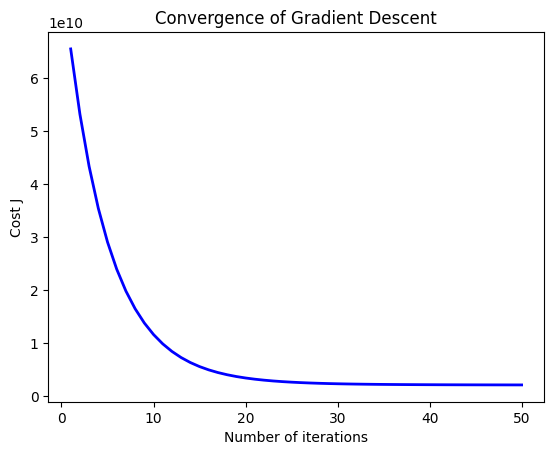

Theta computed from gradient descent:
[338658.2492493  103322.82942954   -474.74249522]


In [129]:
# Running gradient descent
alpha = 0.1
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

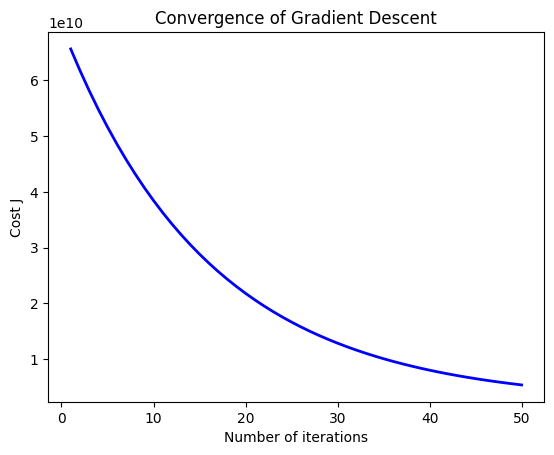

Theta computed from gradient descent:
[266180.44519135  74914.10261664  18590.28082278]


In [130]:
# Running gradient descent
alpha = 0.03
num_iters = 50

theta = np.zeros(X.shape[1])  # Initialize fitting parameters

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Plot the convergence graph
plt.plot(range(1, len(J_history) + 1), J_history, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of Gradient Descent')
plt.show()

print("Theta computed from gradient descent:")
print(theta)

# Normal Equations
# Solving the linear regression problem using normal equations.

In [ ]:
# Normal equations
def normalEqn(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

print("Solving with normal equations...")
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

# Add intercept term to X
X = np.column_stack((np.ones(len(y)), X))

theta = normalEqn(X, y)

print("Theta computed from the normal equations:")
print(theta)

In [ ]:
# Predicting price for a house with 1650 sq-ft and 3 bedrooms using normal equations
price = np.array([1, 1650, 3]) @ theta
print(f"Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $ {price:.2f}")
print(f'Expected price (approx): 293081.46')